In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline


In [48]:
df = pd.read_csv("PossibleDataSets/india-districts-census-2011.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [49]:
df.describe()
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [26]:
list(df.columns.values)

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Househol

In [27]:
ParityCols = [col for col in df.columns.values if "Power_Parity_" in col]

In [51]:
divided = df[ParityCols].divide(df.Total_Power_Parity,axis=0)
model = KMeans(n_clusters=3)
model.fit(divided)
divided['Labels'] = model.labels_

In [52]:
df.drop(ParityCols,axis=1,inplace=True)

In [53]:
merged = pd.concat([df,divided],axis=1)

In [54]:
merged.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Labels
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,0.084004,0.525469,0.063450,0.090259,0.153709,0.066130,0.008937,0.075067,0.013405,2
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,0.118199,0.527205,0.067542,0.083490,0.151032,0.090056,0.026266,0.116323,0.016886,2
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,0.190083,0.504132,0.061983,0.090909,0.152893,0.082645,0.057851,0.140496,0.070248,0
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,0.126168,0.532710,0.056075,0.084112,0.140187,0.088785,0.014019,0.102804,0.032710,2
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,0.124006,0.550079,0.055644,0.079491,0.135135,0.093800,0.012719,0.106518,0.019078,2


In [55]:
merged.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Labels
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,0.230275,0.565139,0.076310,0.057434,0.133744,0.044709,0.055514,0.100223,0.047093,1.134375
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,0.048311,0.091268,0.033661,0.030400,0.053591,0.030236,0.043181,0.069114,0.046702,0.919655
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,0.201149,0.514595,0.056034,0.031813,0.096808,0.017241,0.017720,0.043662,0.013358,0.000000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,0.230976,0.582957,0.072873,0.060345,0.140805,0.042031,0.039723,0.081837,0.029072,1.000000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,0.266117,0.623025,0.093528,0.083279,0.165227,0.066667,0.085565,0.146693,0.069942,2.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,0.511950,0.810450,0.187106,0.139664,0.267725,0.128889,0.174815,0.286420,0.303991,2.000000


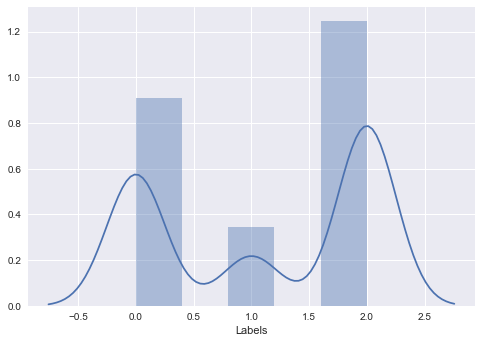

In [67]:
sns.distplot(merged.Labels)
plt.show()

In [74]:
merged.groupby("Labels").mean()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000
Labels,,,,,,,,,,,,,,,,,,,,,
0,341.845494,1.961682e+06,1.007191e+06,9.544905e+05,1.292056e+06,731766.047210,560289.969957,318067.309013,163330.763948,154736.545064,...,0.299290,0.258573,0.557863,0.072881,0.062185,0.135066,0.057872,0.075912,0.133785,0.060018
1,295.386364,2.360015e+06,1.230882e+06,1.129133e+06,1.717866e+06,950928.181818,766937.863636,373377.693182,192594.602273,180783.090909,...,0.186636,0.225486,0.412123,0.128582,0.085574,0.214156,0.081820,0.124348,0.206169,0.117579
2,311.836991,1.711918e+06,8.786117e+05,8.333063e+05,9.762306e+05,566082.924765,410147.633229,295960.664577,152134.548589,143826.115987,...,0.401737,0.210928,0.612664,0.064395,0.046200,0.110595,0.024857,0.021625,0.046483,0.018207


In [75]:
def correlation_matrix(df,target):
    '''Helper function for correlation matrix'''
    k = 20 #number of variables for heatmap
    corrmat = df.corr() #Create a correlation matrix
    cols = corrmat.nlargest(k, target)[target].index #Find the 10 highest correlations
    cm = np.corrcoef(df[cols].values.T)
    fig, ax = plt.subplots() #Plot this as a heatmap
    fig.set_size_inches(10,8)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, \
                     yticklabels=cols.values, xticklabels=cols.values,ax=ax)
    plt.show()


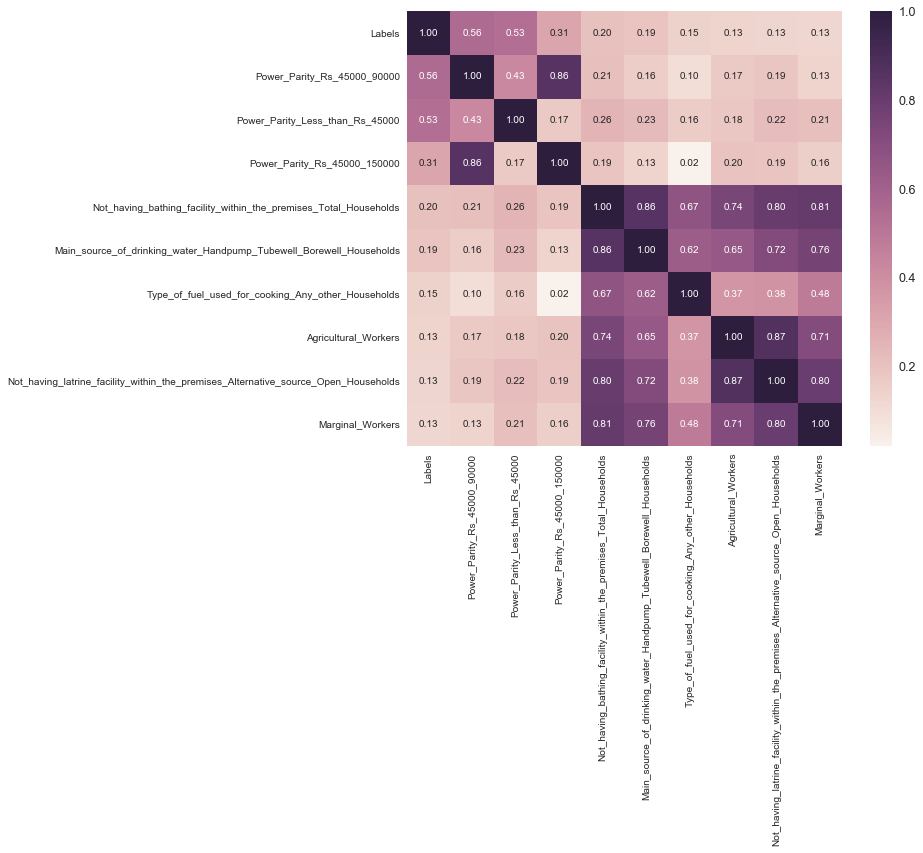

In [78]:
correlation_matrix(merged,"Labels")

In [81]:
phonedata = pd.read_csv("PossibleDataSets/mobile_price.csv",names=["model","price"])
phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 2 columns):
model    5505 non-null object
price    5505 non-null int64
dtypes: int64(1), object(1)
memory usage: 86.1+ KB


In [82]:
phonedata.describe()

,price
count,5505.000000
mean,5749.702452
std,8089.437717
min,399.000000
25%,1288.000000
50%,3349.000000
75%,6900.000000
max,102000.000000


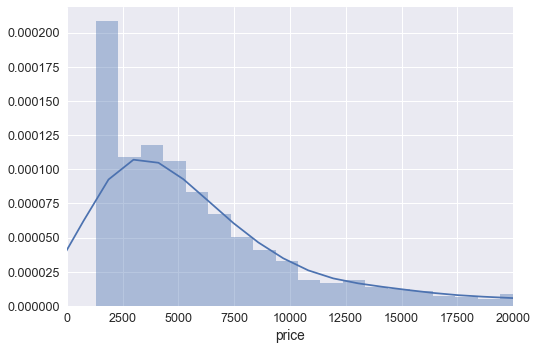

/home/karmanya/anaconda3/envs/MLIntel/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [95]:
onlysmartphones = pd.DataFrame(phonedata.loc[phonedata['price']>=1300])
sns.distplot(onlysmartphones.price,bins=100)
plt.xlim(0,20000)
plt.show()
model = KMeans(n_clusters=3)
model.fit(onlysmartphones.price.reshape(-1,1))
onlysmartphones['Labels']= model.labels_

In [86]:
phonedata.loc[phonedata['price']<=1300].count()

model    1464
price    1464
dtype: int64

In [98]:
onlysmartphones.groupby("Labels").describe()

price
Labels                     
0      count    3244.000000
       mean     4313.342787
       std      2306.439855
       min      1300.000000
       25%      2249.000000
       50%      3999.000000
       75%      5999.000000
       max      9799.000000
1      count     133.000000
       mean    44312.278195
       std     14254.611129
       min     29845.000000
       25%     33280.000000
       50%     39999.000000
       75%     50000.000000
       max    102000.000000
2      count     677.000000
       mean    15343.450517
       std      4837.880193
       min      9849.000000
       25%     11499.000000
       50%     13991.000000
       75%     18000.000000
       max     28999.000000

In [ ]:
features = Mcopy.drop('Maths %',axis=1)
target = Mcopy['Maths %']
tree = RandomForestRegressor()
tree.fit(features,target)
sorted(zip(tree.feature_importances_,Mcopy.columns.values),reverse=True)[:10]